In [11]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:

def find_closest_centroids(X, centroids):

    K = centroids.shape[0] #number of centroids

    idx = np.zeros(X.shape[0], dtype=int) #it is array of length of number of ex 
                                          #index i contains the centroid-index for ith example

    for i in range(X.shape[0]):
        dists =[] #distances of ith eample from all centroids
        for j in range(K):
            norm_ij = np.linalg.norm(X[i]-centroids[j])
            dists.append(norm_ij)
        
        idx[i]= np.argmin(dists) 
    
    return idx

In [3]:

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        mems = X[idx==k]
        centroids[k]= sum(mems)/len(mems)

    return centroids

In [12]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):

        print("K-Means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [13]:
def load_data():
    X = np.load("ex7_X.npy")
    return X

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


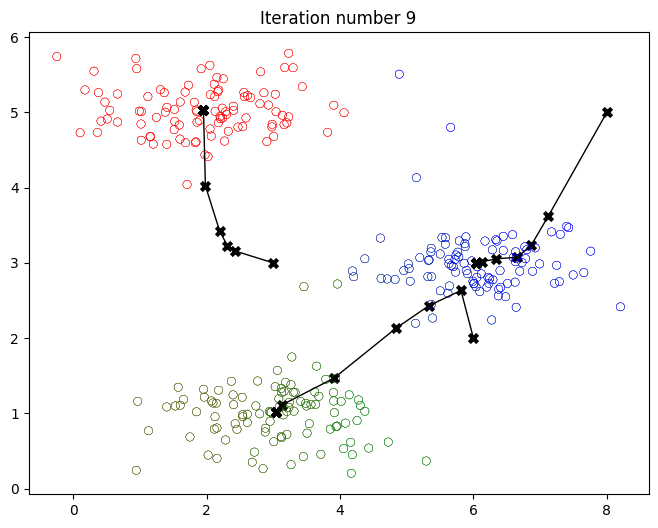

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [15]:

X = load_data()

initial_centroids = np.array([[3,3],[6,2],[8,5]])

max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters,plot_progress=True)
print(centroids)